In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 중복 처리

In [2]:
wine = pd.read_csv('winequality-red.csv')
df = wine.copy()
df1 = df.drop_duplicates()
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 이상치 처리

### 1. 이상치가 아니지만 주관적으로 판단하여 이상치를 정상 범주에 넣은 변수
- fixed acidity

- volatile acidity

- residual sugar

- total sulfur dioxide

- sulphates

In [3]:
# 각 열에 대한 임계값 및 상한값 딕셔너리 정의
criteria = {
    'fixed acidity': 12.9,
    'volatile acidity': 1.04,
    'residual sugar': 6.6,
    'total sulfur dioxide': 149.0,
    'sulphates': 1.09
}

In [4]:
# 산점도를 그릴 열 선택
selected_columns = ['fixed acidity', 'volatile acidity', 'residual sugar',
                    'total sulfur dioxide', 'sulphates']

# 각 열에 대해 반복
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 임계값 및 상한값 지정
    threshold = criteria[column_name]

    # 이상치에 해당하는 데이터 선택
    red_points = df1[df1[column_name] > threshold]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()
    

### 2. 주관적 판단하지 않은 이상치를 가지는 변수
- citric acid

- free sulfur dioxide

- alcohol

In [5]:
import matplotlib.pyplot as plt

# 선택할 열들
selected_columns = ['citric acid', 'free sulfur dioxide', 'alcohol']

# 반복문으로 각 열에 대한 이상치를 중앙값으로 대체하고 산점도 그리기
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 특정 조건에 맞는 데이터 선택
    red_points = df1[df1[column_name] > upper_bound]
    blue_points = df1[df1[column_name] <= upper_bound]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()


### 3. Zscore를 통해 이상치 판별을 한 변수
- pH

- density

In [6]:
# pH

import matplotlib.pyplot as plt

# 선택한 열
column_name = 'pH'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 2.86) | (df1[column_name] > 3.75)]
green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= 3.75) & (df1[column_name] >= 2.86)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()


In [7]:
# density

import matplotlib.pyplot as plt

# 선택한 열
column_name = 'density'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 0.9912) | (df1[column_name] > 1.0022)]
green_points = df1[(df1[column_name] >= 0.9912) & (df1[column_name] <= upper_bound) & (df1[column_name] <= 1.0022)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

### 4. 규칙성을 찾아 이상치 판단한 변수 
- chlorides

In [8]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'chlorides'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 특정 조건에 맞는 데이터 선택
red_points = df1[df1[column_name] > 0.34]
green_points = df1[(df1[column_name] <= 0.038) | ((df1[column_name] >= 0.123) & (df1[column_name] <= 0.337))]
blue_points = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

### * 종합하기 (df2) 

In [9]:
df2 = df1.copy()

In [10]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 1. 로그변환

## 첨도, 왜도 확인하기(전&후) 

In [11]:
import numpy as np
import pandas as pd

df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성
df2_A_log = df2_A.apply(lambda x: np.log1p(x))  # 로그 변환

# 각 열에 대해 왜도와 첨도 계산
skewness_result_before = df2_A.skew()
kurtosis_result_before = df2_A.kurtosis()
skewness_result_after = df2_A_log.skew()
kurtosis_result_after = df2_A_log.kurtosis()

# 결과 출력
print("=== 왜도 결과 (로그 변환 전 vs. 후) ===")
comparison_skewness = pd.DataFrame({
    'Before Transformation': skewness_result_before,
    'After Transformation': skewness_result_after
})
print(comparison_skewness)

print("\n=== 첨도 결과 (로그 변환 전 vs. 후) ===")
comparison_kurtosis = pd.DataFrame({
    'Before Transformation': kurtosis_result_before,
    'After Transformation': kurtosis_result_after
})
print(comparison_kurtosis)

=== 왜도 결과 (로그 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.690510              0.260592
volatile acidity                   0.408120              0.138489
citric acid                        0.287387              0.068019
residual sugar                     2.363971              1.438817
chlorides                          3.432842              3.106219
free sulfur dioxide                0.790797             -0.193891
total sulfur dioxide               1.122658             -0.078491
density                           -0.027257             -0.030277
pH                                 0.028089             -0.079822
sulphates                          0.871487              0.656345
alcohol                            0.740082              0.593282

=== 첨도 결과 (로그 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.133181             -0.161114
volatile acidit

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'  # 시스템에 설치된 다른 폰트로 변경

## 히스토그램 변화 확인하기 

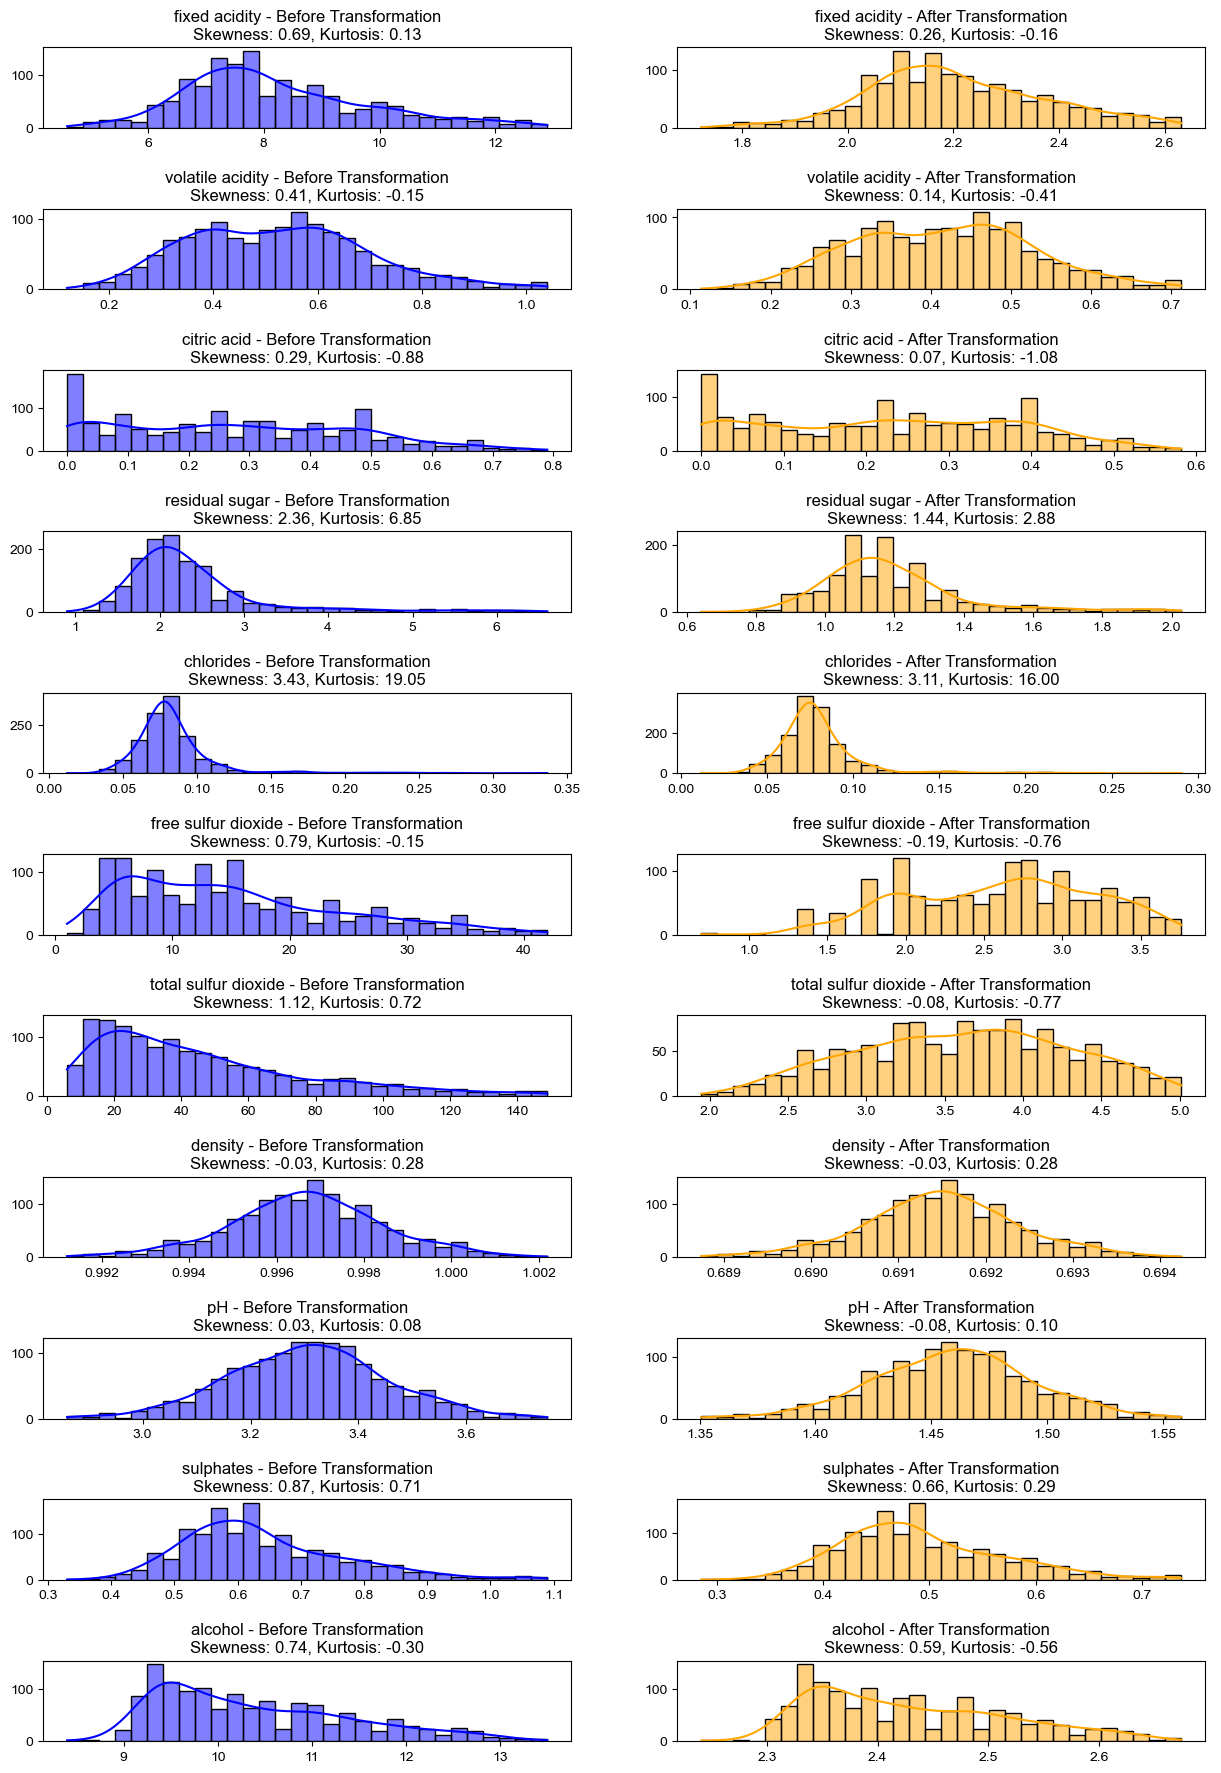

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 로그 변환 함수
log_transform = lambda x: np.log1p(x)

# 플롯 설정
fig, axes = plt.subplots(len(df2_A.columns), 2, figsize=(15, 2 * len(df2_A.columns)))
fig.subplots_adjust(hspace=1.0)

# 각 변수에 대한 히스토그램 그리기
for i, column in enumerate(df2_A.columns):
    # 로그 변환 전
    sns.histplot(df2_A[column], bins=30, kde=True, color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f"{column} - Before Transformation\nSkewness: {skewness_result_before[column]:.2f}, Kurtosis: {kurtosis_result_before[column]:.2f}")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    
    # 로그 변환 후
    sns.histplot(df2_A_log[column], bins=30, kde=True, color='orange', ax=axes[i, 1])
    axes[i, 1].set_title(f"{column} - After Transformation\nSkewness: {skewness_result_after[column]:.2f}, Kurtosis: {kurtosis_result_after[column]:.2f}")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()

## QQ plot 확인하기

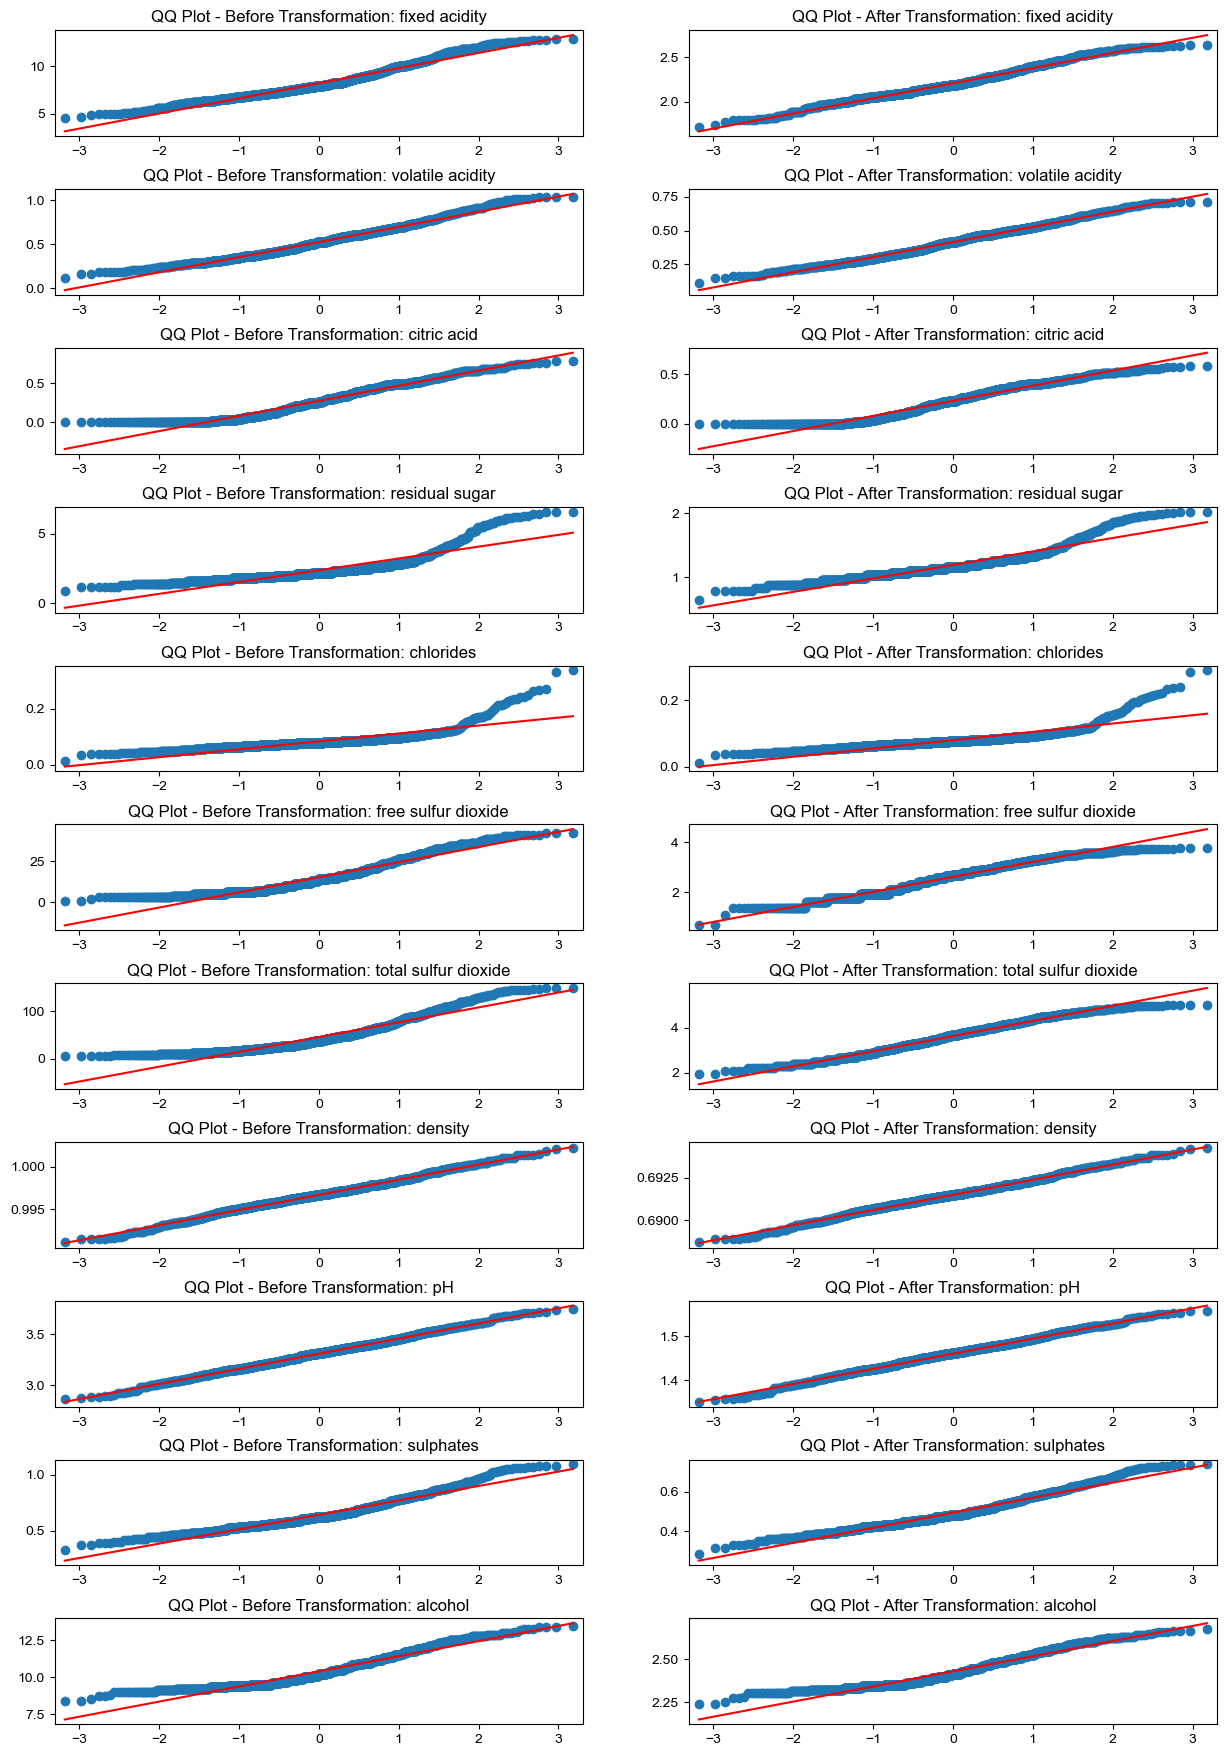

In [14]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# 로그 변환 함수
log_transform = lambda x: np.log1p(x)

# 플롯 설정
fig, axes = plt.subplots(len(df2_A.columns), 2, figsize=(15, 2 * len(df2_A.columns)))
fig.subplots_adjust(hspace=0.5)

# 각 변수에 대한 QQ 플롯 그리기
for i, column in enumerate(df2_A.columns):
    # 로그 변환 전
    sm.qqplot(df2_A[column], line='s', ax=axes[i, 0])
    axes[i, 0].set_title(f"QQ Plot - Before Transformation: {column}")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')

    # 로그 변환 후
    sm.qqplot(log_transform(df2_A[column]), line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f"QQ Plot - After Transformation: {column}")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()

## 정규성 검정 

In [15]:
from scipy.stats import shapiro

for column in df2_A.columns:
    _, p_before = shapiro(df2_A[column])
    _, p_after = shapiro(df2_A_log[column])
    
    print(f"{column}:")
    print(f"  - Before Transformation: p-value = {p_before:.4f}")
    print(f"  - After Transformation: p-value = {p_after:.4f}")
    print()


fixed acidity:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

volatile acidity:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

citric acid:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

residual sugar:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

chlorides:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

free sulfur dioxide:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

total sulfur dioxide:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

density:
  - Before Transformation: p-value = 0.0012
  - After Transformation: p-value = 0.0012

pH:
  - Before Transformation: p-value = 0.0747
  - After Transformation: p-value = 0.0387

sulphates:
  - Before Transformation: p-value = 0.0000
  - After Transformation